In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime

workdir = "D://DrugResponsivenessGuideline_log//Dataset//EDC_EYDC_MDC_regen"

In [2]:
# < Important note > [ Please download input data from https://mega.nz/#F!CeYGDKyS!uqkmWJ4E2XSGJp_C2VO2gg]
# IC50evaluation//Dataset//Scenario3_EYDC-9K_minmax

dataset = np.load(workdir + "//EYDC9K_dataset.npz") # input file
ss0 = np.load(workdir + '//EYDC9K_dataset_r0_9_1.npz') # split for training and test

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 37


In [6]:
x.shape

(9590, 41505)

In [7]:
training_image_array.shape

(8631, 41505)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [10]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [11]:
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(train_X,train_y)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-11-22 21:16:15.879257
[21:16:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
EndTime : 2020-11-22 21:29:02.616251


In [12]:
test_eval = model.score(test_X,test_y)

In [13]:
test_eval

0.7350787921715063

In [14]:
predicted_classes = model.predict(test_X)

In [15]:
predicted_value = predicted_classes

In [16]:
import pickle
from sklearn.externals import joblib
workdir = "D://DrugResponsivenessGuideline_log//Result//EDC_EYDC_MDC_regen//EYDC9K//XGB"
joblib.dump(model, workdir + '//EYDC9K_XGB_model.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Result//EDC_EYDC_MDC_regen//EYDC9K//XGB//EYDC9K_XGB_model.pkl']

In [17]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]

In [18]:
c.to_csv(workdir + '//EYDC9K_XGB_pred_obs_table.csv')

In [19]:
predicted_value.shape

(959,)

In [20]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7387411370714876, intercept=0.18699557721208937, rvalue=0.8576515082831135, pvalue=1.1392954430523344e-278, stderr=0.014318054663249454)

In [21]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7350787921715063


In [22]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.0184262298616893


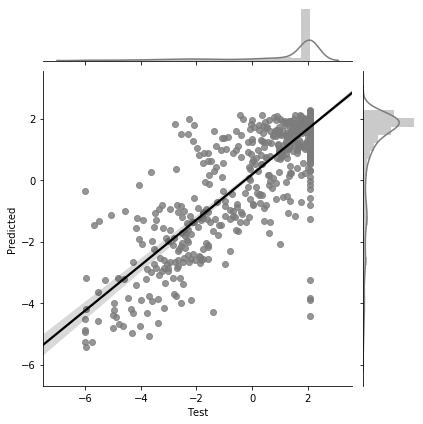

In [23]:
workdir = "D://DrugResponsivenessGuideline_log//Figures//Backbone//EDC_EYDC_MDC_regen//EYDC-9K"
import seaborn as sns

g = sns.jointplot(x="Test", y="Predicted", data=c, kind='reg', color='#7C7C7C',
                  joint_kws={'line_kws':{'color':'black'}})
g.savefig(workdir+ '//EYDC9K_XGB.png', dpi=300)